## Data  개요
**적포도주 및 백포도주 샘플의 물리화학적 특성 및 품질 등급**
- UCI 머신러닝 저장소에 공개 : [dataset](https://archive.ics.uci.edu/ml/datasets/Wine+Quality)
- 포르투갈 "Vinho Verde" 와인의 레드 및 화이트 변종 샘플에 대한 정보를 제공
- 각 와인 샘플은 와인 전문가에 의해 품질 평가를 받았고 화학적 테스트를 거쳤음
- 개인 정보 보호 및 물류 문제로 인해 포도 유형, 와인 브랜드, 와인 판매 가격 등에 대한 데이터가 없음

```
   Input variables (based on physicochemical tests):
   1 - fixed acidity (고정된 산도)
   2 - volatile acidity (휘발성 산도)
   3 - citric acid (구연산)
   4 - residual sugar (잔여 설탕)
   5 - chlorides (염화물)
   6 - free sulfur dioxide (유리 이산화황)
   7 - total sulfur dioxide (총 이산화황)
   8 - density (밀도)
   9 - pH (산도)
   10 - sulphates (황산염)
   11 - alcohol (알코올)
   
   Output variable (based on sensory data):
   12 - quality (품질) (score between 0 and 10)
```


## Step 1: 질문하기 (Ask questions)
데이터가 주어진 상태에서 질문을 할 수도 있고, 질문에 답할 수 있는 데이터를 수집할 수도 있다.

**질문 예시**
- 질문 1. 와인의 품질을 예측하는 데 가장 중요한 화학적 특성은 무엇일까?
- 질문 2. 어떤 유형(white, red)의 와인이 더 좋은 평가를 받을까?
- 질문 3. 알코올 도수가 높은 와인이 더 좋은 평가를 받을까?
- 질문 4. 더 달콤한 와인이 더 나은 평가를 받을까?
- 질문 5. 어느 정도의 산도가 와인 품질에 영향을 미칠까?

## Step 2: 데이터 랭글링 (Wrangle data)
- 데이터 랭글링 : 원자료(raw data)를 보다 쉽게 접근하고 분석할 수 있도록 데이터를 정리하고 통합하는 과정
(참고. 위키피디아)
- 세부적으로는 데이터의 수집(gather), 평가(assess), 정제(clean) 작업으로 나눌 수 있다.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**데이터 수집(gather)**

In [2]:
red_df = pd.read_table('./file/0512/winequality-red.csv', sep=';')
white_df = pd.read_table('./file/0512/winequality-white.csv', sep=';')

In [3]:
red_df.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


**평가(assess)**

In [4]:
red_df.shape

(1599, 12)

In [5]:
white_df.shape

(4898, 12)

- 요약 정보

In [6]:
red_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
white_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


- 중복 데이터 확인

In [9]:
red_df.duplicated().sum()

np.int64(240)

In [10]:
white_df.duplicated().sum()

np.int64(937)

- quality 특성의 고유값과 개수 확인

In [11]:
white_df['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9])

In [12]:
white_df['quality'].nunique()

7

In [13]:
red_df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [14]:
red_df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [15]:
red_df['quality'].nunique()

6

- 통계 정보 및 히스토그램

In [16]:
red_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


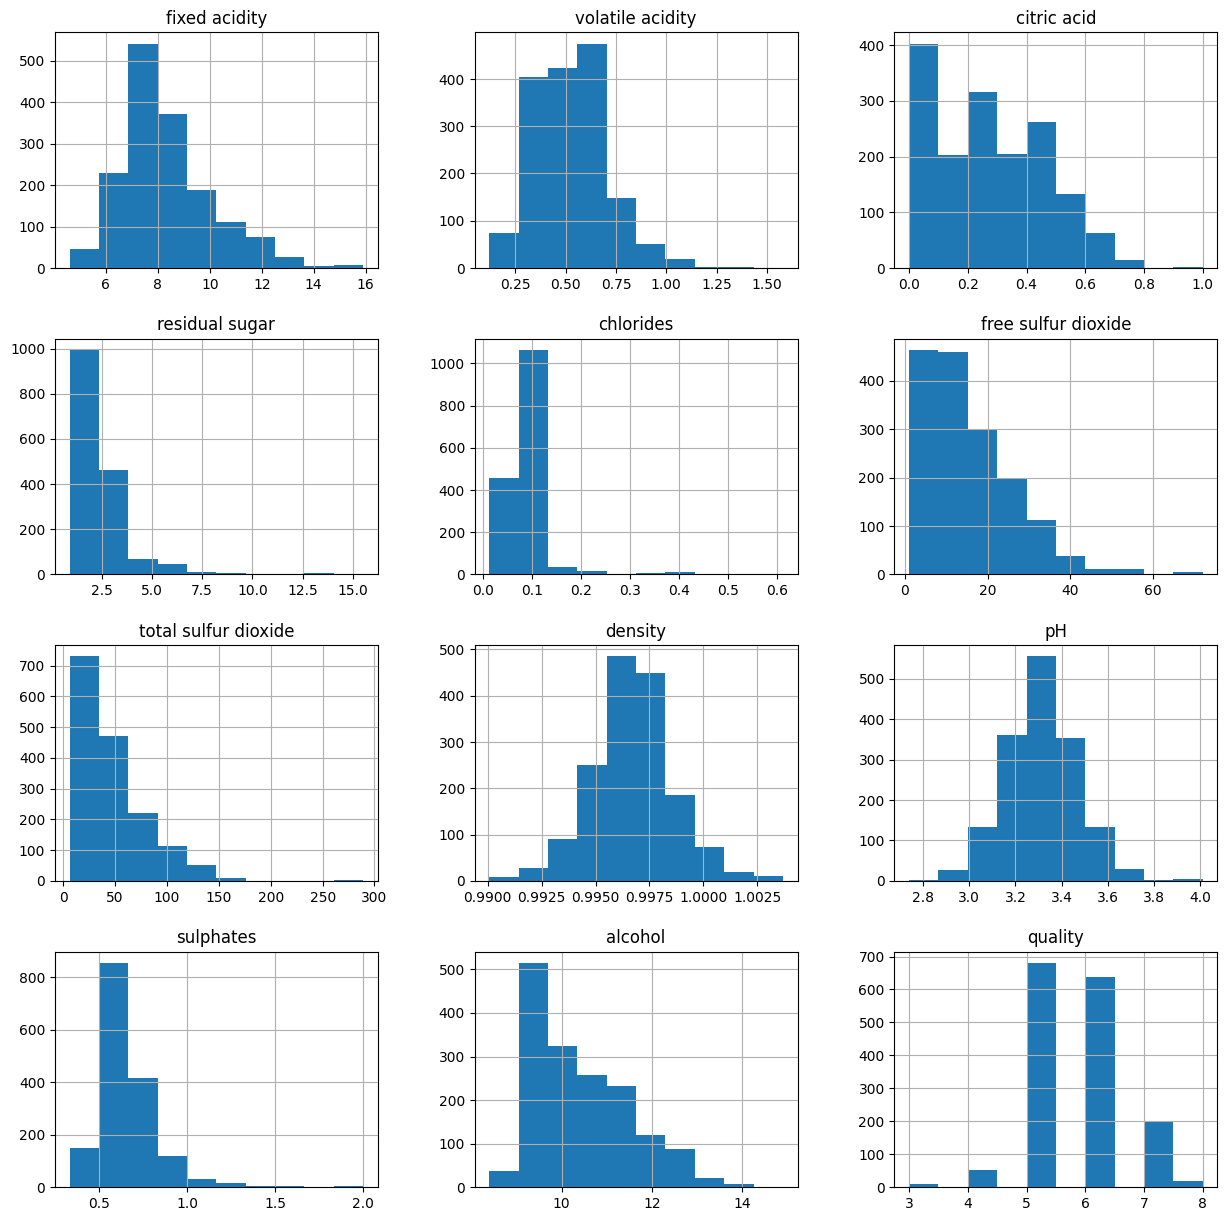

In [17]:
red_df.hist(figsize=(15,15))
plt.show()

In [18]:
white_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


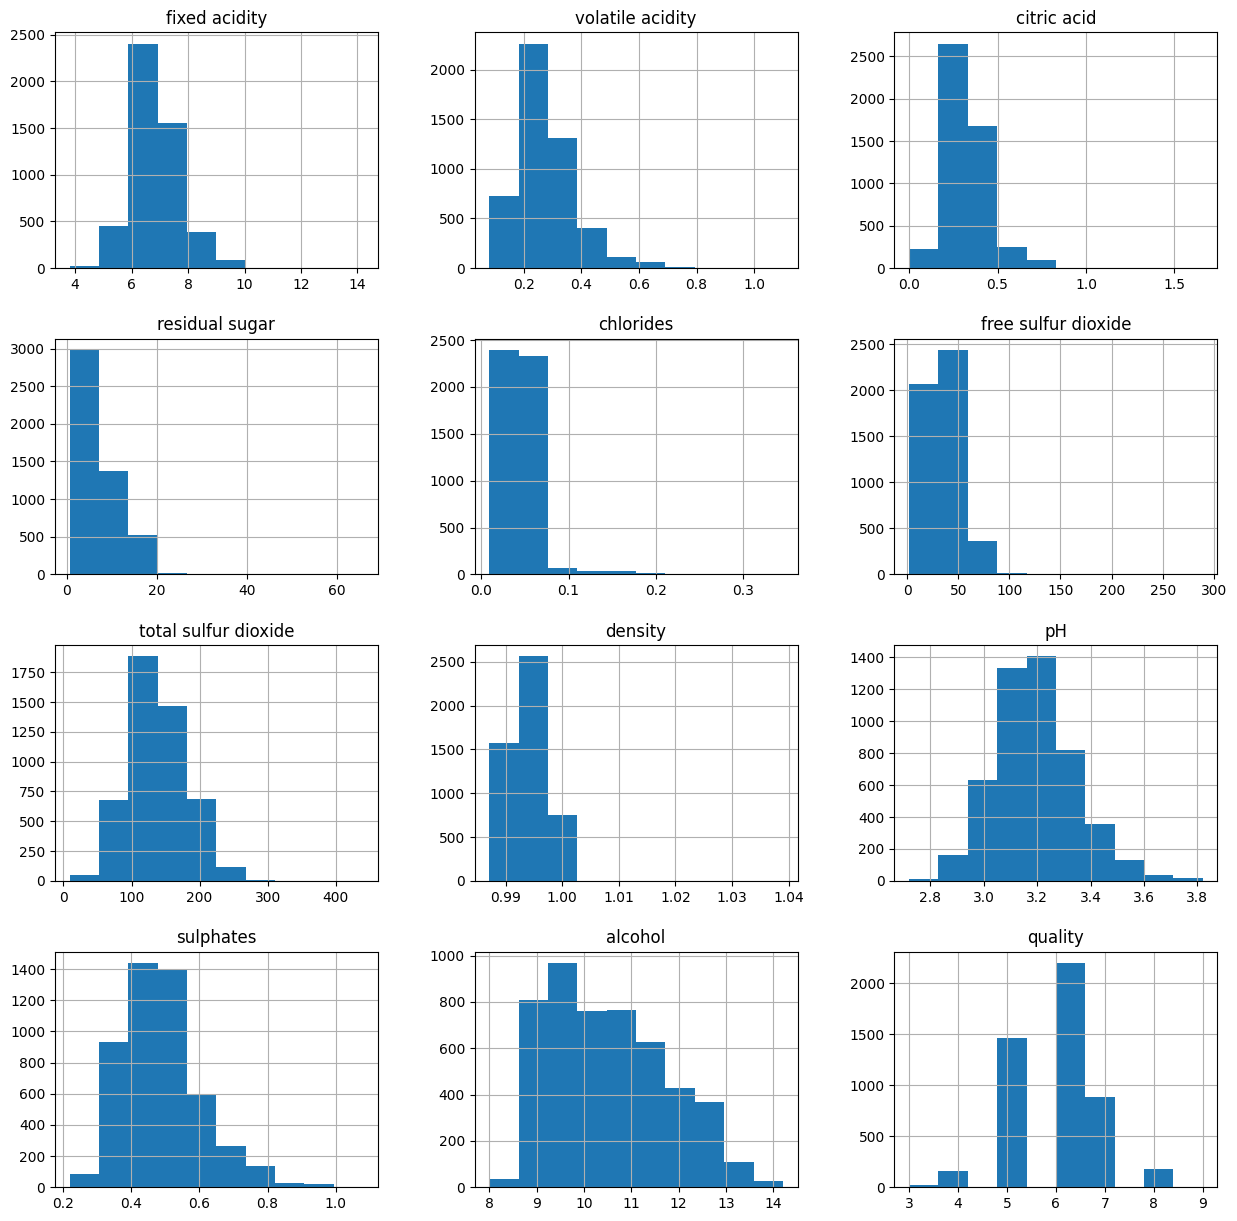

In [19]:
white_df.hist(figsize=(15,15))
plt.show()

**정제(clean)**

- 중복 제거 및 두 데이터 프레임 합치기

In [20]:
white_df.drop_duplicates(inplace=True)
white_df.shape

(3961, 12)

In [21]:
red_df.drop_duplicates(inplace=True)
red_df.shape

(1359, 12)

In [22]:
red_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [23]:
white_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [24]:
red_df.columns == white_df.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [25]:
white_df['color'] = 'white'
red_df['color'] = 'red'

In [26]:
wine_df = pd.concat([red_df, white_df], axis=0) # 0번축(행축)을 따라서 연결

In [27]:
wine_df.tail().T

,4893,4894,4895,4896,4897
fixed acidity,6.2,6.6,6.5,5.5,6.0
volatile acidity,0.21,0.32,0.24,0.29,0.21
citric acid,0.29,0.36,0.19,0.3,0.38
residual sugar,1.6,8.0,1.2,1.1,0.8
chlorides,0.039,0.047,0.041,0.022,0.02
free sulfur dioxide,24.0,57.0,30.0,20.0,22.0
total sulfur dioxide,92.0,168.0,111.0,110.0,98.0
density,0.99114,0.9949,0.99254,0.98869,0.98941
pH,3.27,3.15,2.99,3.34,3.26
sulphates,0.5,0.46,0.46,0.38,0.32


## Step 3: 데이터 탐색 (Exploratory Data Analysis)
데이터의 패턴을 찾고, 관계를 시각화 하는 작업 등으로 통해 데이터에 대한 직관을 극대화 한다.

- 새로 결합된 데이터프레임으로 히스토그램 확인

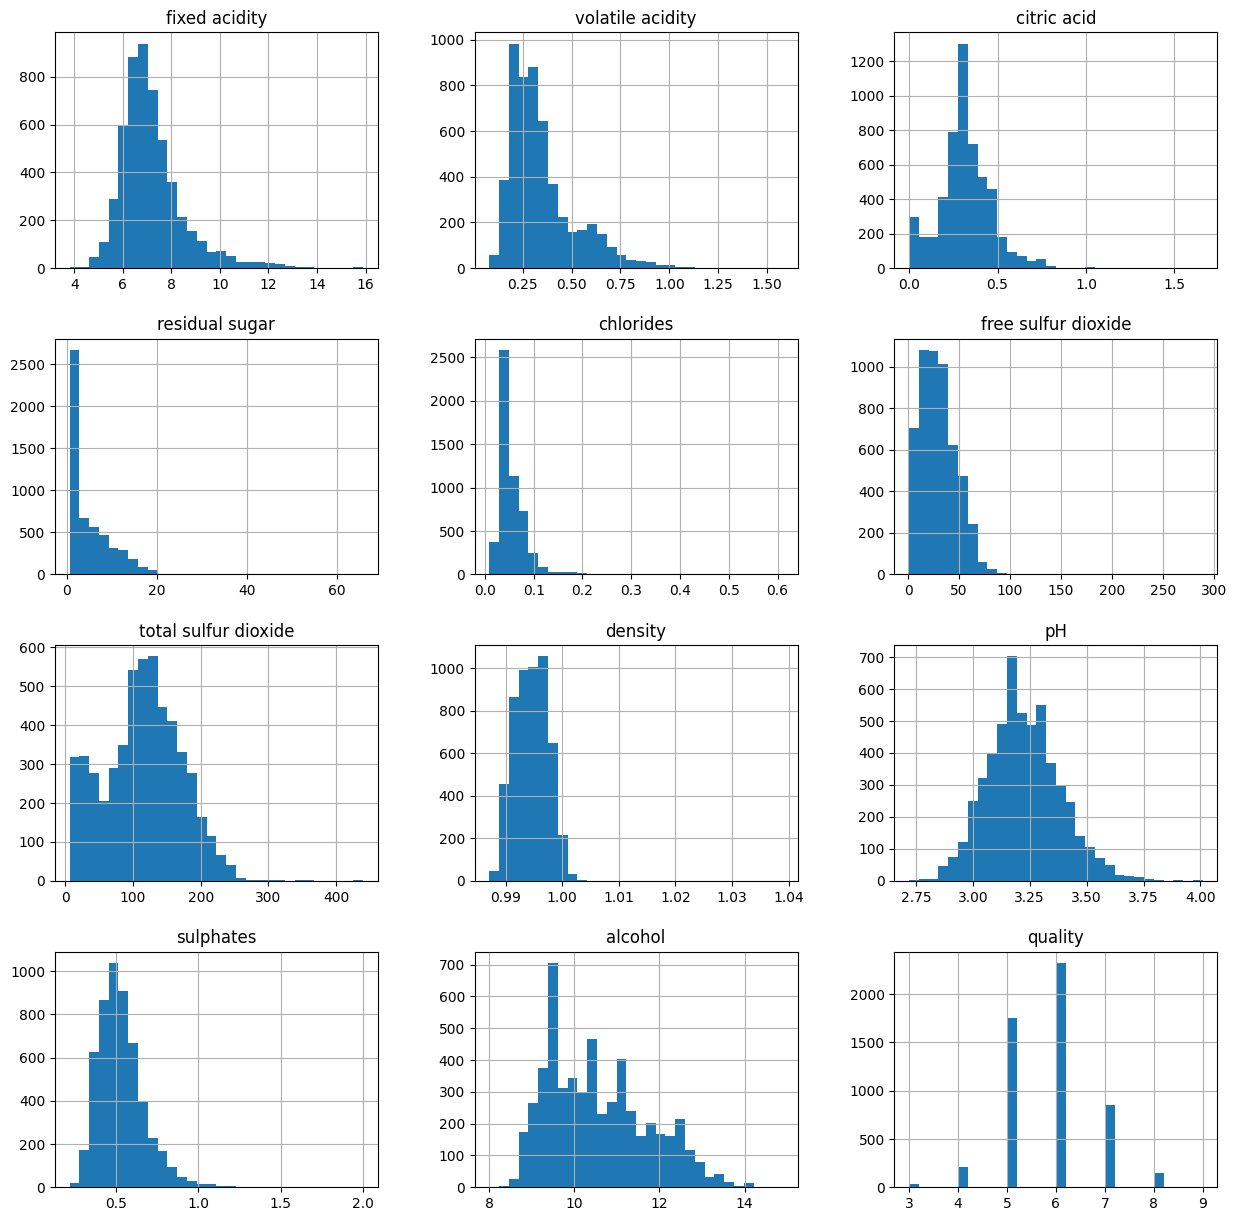

In [28]:
wine_df.hist(bins=30, figsize=(15,15))
plt.show()

- 특성 중 오른쪽으로 꼬리가 긴 분포 :
  - (예) fixed acidity, alcohol... 등이 있음
  - 변량의 대표값으로 평균값이 부적절할 수 있음.
  - 머신러닝에서 선형회귀로 모델링을 할 때는 정규분포로 바꿔줘야함

- 새로 결합된 데이터프레임으로 산점도 및 상관계수 확인

In [29]:
wine_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'color'],
      dtype='object')

In [30]:
scatt_cols = ['volatile acidity', 'residual sugar', 'pH', 'alcohol', 'quality']

In [31]:
wine_df[scatt_cols]

,volatile acidity,residual sugar,pH,alcohol,quality
0,0.70,1.9,3.51,9.4,5
1,0.88,2.6,3.20,9.8,5
2,0.76,2.3,3.26,9.8,5
3,0.28,1.9,3.16,9.8,6
5,0.66,1.8,3.51,9.4,5
...,...,...,...,...,...
4893,0.21,1.6,3.27,11.2,6
4894,0.32,8.0,3.15,9.6,5
4895,0.24,1.2,2.99,9.4,6
4896,0.29,1.1,3.34,12.8,7


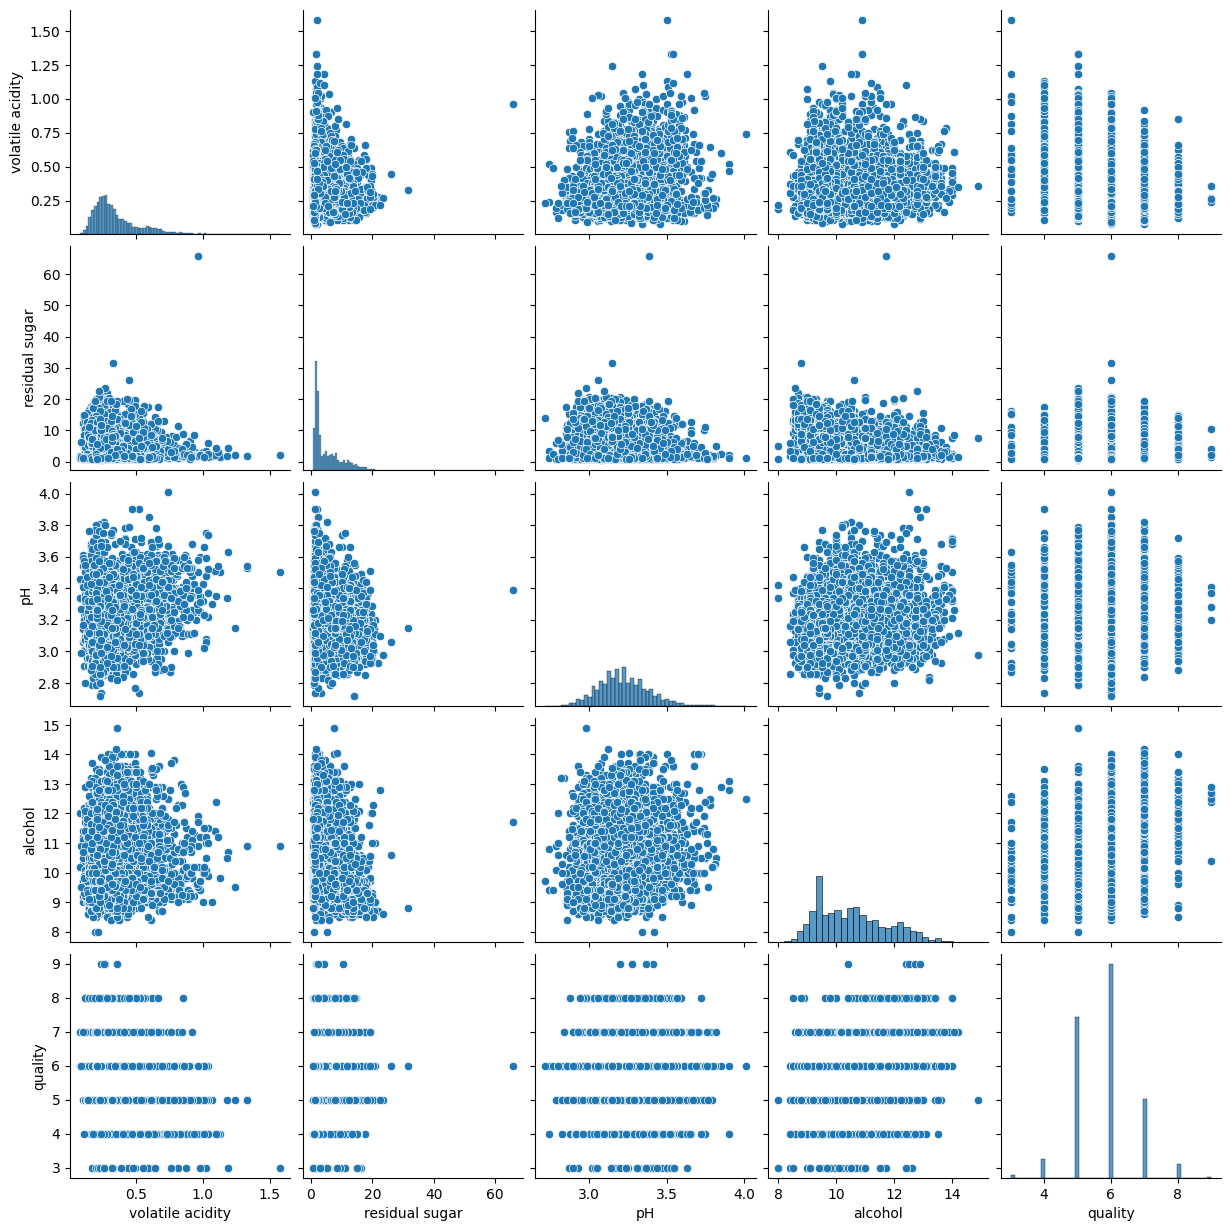

In [32]:
sns.pairplot(wine_df[scatt_cols])
plt.show()

In [33]:
wine_df[scatt_cols].corr()['quality'].sort_values(ascending=False)

quality             1.000000
alcohol             0.469422
pH                  0.039733
residual sugar     -0.056830
volatile acidity   -0.265205
Name: quality, dtype: float64

- 품질(quality)에 양의 상관관계가 있는 특성은 alcohol

## Step 4: 결론 도출 또는 예측 (Draw conclusions or make predictions)

- 질문 1. 와인의 품질을 예측하는 데 가장 중요한 화학적 특성은 무엇일까?
  - 품질(quality)에 양의 상관관계가 있는 특성은 alcohol

- 질문 2. 어떤 유형(white, red)의 와인이 더 좋은 평가를 받을까?
  - white wine의 quality의 평균이 더 높다.

In [35]:
wine_df.groupby('color').mean()['quality']

color
red      5.623252
white    5.854835
Name: quality, dtype: float64

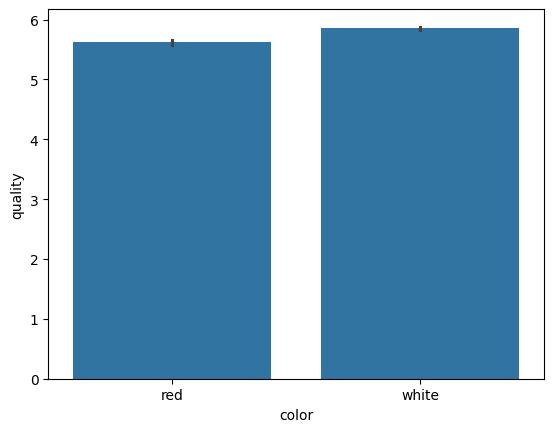

In [36]:
sns.barplot(data=wine_df, x='color', y='quality')
plt.show()

- 질문 3. 알코올 도수가 높은 와인이 더 좋은 평가를 받을까?
  -  알콜 도수가 높은 와인의 quality가 높다.

In [37]:
alcohol_median = wine_df['alcohol'] .median()
alcohol_median

np.float64(10.4)

In [38]:
high_alcohol = wine_df[wine_df['alcohol'] > alcohol_median]
low_alcohol = wine_df[wine_df['alcohol'] <= alcohol_median]

In [39]:
high_alcohol['quality'].mean()

np.float64(6.160973694542599)

In [40]:
low_alcohol['quality'].mean()

np.float64(5.460151460512081)

- 질문 4. 더 달콤한 와인이 더 나은 평가를 받을까?
  - 더 달콤한 와인이 나은 평가를 받는다.

<Axes: >

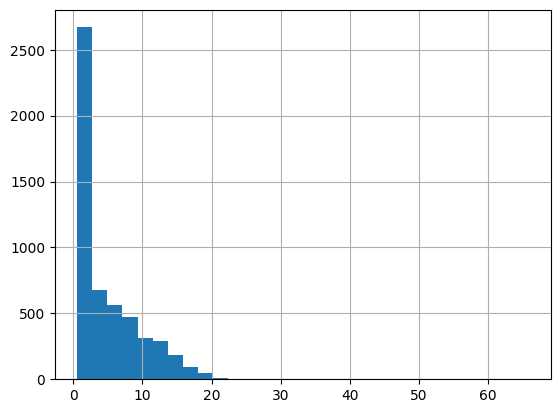

In [41]:
wine_df['residual sugar'].hist(bins=30)

In [42]:
wine_df['residual sugar'].describe()

count    5320.000000
mean        5.048477
std         4.500180
min         0.600000
25%         1.800000
50%         2.700000
75%         7.500000
max        65.800000
Name: residual sugar, dtype: float64

- 불리안 연산으로 low_sugar/high_sugar를 분리

In [44]:
sugar_median = wine_df['residual sugar'] .median()
sugar_median

np.float64(2.7)

In [45]:
wine_df['residual sugar'] > sugar_median # <-- 불리안 연산의 결과를 인덱스

0       False
1       False
2       False
3       False
5       False
        ...  
4893    False
4894     True
4895    False
4896    False
4897    False
Name: residual sugar, Length: 5320, dtype: bool

In [46]:
high_sugar = wine_df[wine_df['residual sugar'] > sugar_median]
low_sugar = wine_df[wine_df['residual sugar'] <= sugar_median]

In [47]:
high_sugar['quality'].mean()

np.float64(5.80188679245283)

In [48]:
low_sugar['quality'].mean()

np.float64(5.789513108614233)

- pd.cut으로 residual sugar 특성을 범주형(low_sugar/high_sugar)으로 나눔

In [49]:
# option 1
wine_df['how_sweet'] = pd.cut(wine_df['residual sugar'], bins=[-np.inf, 2.7, np.inf], labels=['low', 'high'])

In [50]:
# option 2
wine_df['how_sweet'] = pd.qcut(wine_df['residual sugar'], q=2, labels=['low', 'high'])

In [51]:
wine_df['how_sweet'].value_counts()

how_sweet
low     2670
high    2650
Name: count, dtype: int64

In [52]:
wine_df['how_sweet']

0        low
1        low
2        low
3        low
5        low
        ... 
4893     low
4894    high
4895     low
4896     low
4897     low
Name: how_sweet, Length: 5320, dtype: category
Categories (2, object): ['low' < 'high']

- seaborn 막대그래프

<Axes: xlabel='how_sweet', ylabel='quality'>

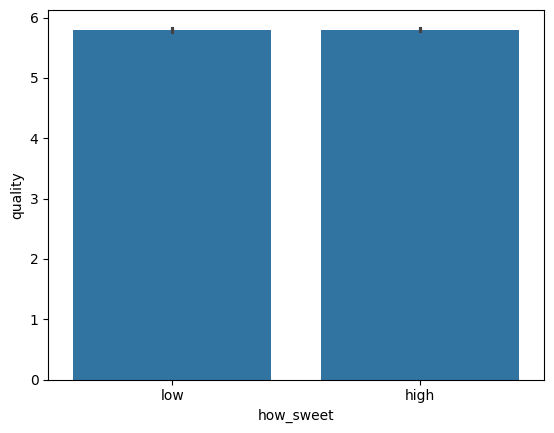

In [53]:
sns.barplot(data=wine_df, x='how_sweet', y='quality')

In [54]:
wine_df.groupby('how_sweet')['quality'].mean()

C:\Users\user\AppData\Local\Temp\ipykernel_5820\895306171.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  wine_df.groupby('how_sweet')['quality'].mean()


how_sweet
low     5.789513
high    5.801887
Name: quality, dtype: float64

- 질문 5. 어느 정도의 산도가 와인 품질에 영향을 미칠까?
  - 산도를 4등분(양기준) 했을 때 high 그룹의 quality 평균값이 높다.

In [55]:
wine_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'color', 'how_sweet'],
      dtype='object')

In [56]:
wine_df['pH'].describe()

count    5320.000000
mean        3.224664
std         0.160379
min         2.720000
25%         3.110000
50%         3.210000
75%         3.330000
max         4.010000
Name: pH, dtype: float64

In [57]:
wine_df['pH_level'] = pd.qcut(wine_df['pH'], q=4, labels=['low', 'medium', 'high', 'very high'])
wine_df['pH_level'].value_counts()

pH_level
high         1391
low          1332
medium       1330
very high    1267
Name: count, dtype: int64

<Axes: xlabel='pH_level', ylabel='quality'>

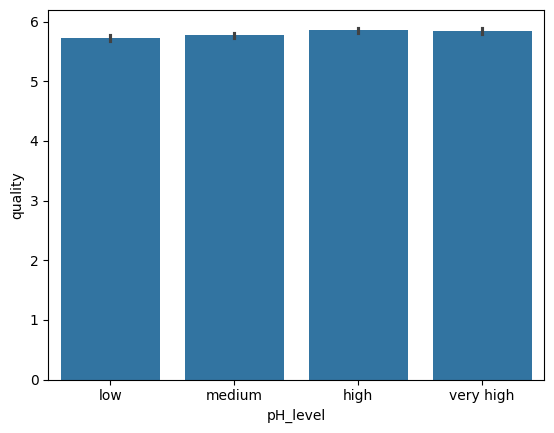

In [58]:
sns.barplot(data=wine_df, x='pH_level', y='quality')

In [59]:
wine_df.groupby('pH_level')['quality'].mean()

C:\Users\user\AppData\Local\Temp\ipykernel_5820\2800325621.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  wine_df.groupby('pH_level')['quality'].mean()


pH_level
low          5.728228
medium       5.766917
high         5.852624
very high    5.834254
Name: quality, dtype: float64

## Step 5: 결과 공유 (Communicate the results)
보고서, 이메일, 블로그 등 다양한 방법을 통해 발견한 통찰들을 공유할 수 있다.